## Cryptocurrency Cluster

### Data Preparation

In [1]:
# Add dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
# Loading the preprocessed crypto dataset
file_path = Path("./Resources/crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [26]:
# Find the currencies that are being traded
df_crypto = df_crypto[df_crypto["IsTrading"] == True]
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [27]:
# Drop the IsTrading Column
df_crypto = df_crypto.drop(["IsTrading"], axis='columns')
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [28]:
# Remove all rows that have at least 1 null value
df_crypto = df_crypto.dropna()
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [29]:
# Select currencies that have been mined: TotalCoinsMined > 0
df_crypto = df_crypto[df_crypto["TotalCoinsMined"] > 0]
df_crypto

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [30]:
# Remove CoinName and convert all data to numeric
df_crypto = df_crypto.drop(columns=["CoinName"])
df_crypto

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [34]:
df_crypto = df_crypto.set_index('Unnamed: 0')
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [35]:
X = pd.get_dummies(data=df_crypto, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Standarize data with StandarScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Dimensionality Reduction

In [37]:
# Perform dimensionality reduction with PCA and preserve 90% of the explained variance

# Initialize PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca.shape


(532, 74)

#### How did the number of features change?
After using PCA, the number of y features was reduced to 74 from 98.

In [38]:
# Reduce the dataset dimensions with t-SNE by running t-SNE on the principal components: the output of 
## the PCA transformation. Create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

In [39]:
# Prepare to plot the dataset

# The first column of transformed features
X = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

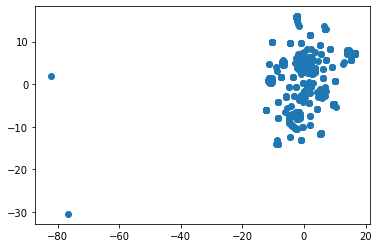

In [40]:
# Plot the scatter plot
plt.scatter(X, y)
plt.show()

## Cluster Analysis with k-Means

In [ ]:
# Find the cluster with KMeans
inertia = []
k = 